### **Exploración y preprocesamiento de datos**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import shapiro

# 1. Cargar el archivo CSV
# Cargamos los datos para comenzar con el análisis.
pd.set_option('display.width', 1000)
dataframe = pd.read_csv('diabetes.csv')
print("Datos iniciales:")
print(dataframe.head())  # Muestra una vista rápida de los datos

Datos iniciales:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1


In [14]:
# 2. Exploración inicial del conjunto de datos
# Revisión básica para entender el tipo de datos y posibles problemas.
print("\nInformación general del conjunto de datos:")
print(dataframe.info())  # Revisión de tipos de datos y valores faltantes.

print("\nDescripción estadística básica:")
print(dataframe.describe())  # Estadísticas básicas.

# Verificación de valores únicos en cada columna.
print("\nValores únicos por columna:")
print(dataframe.nunique())


Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Descripción estadística básica:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age     Outcome
count   768.000000  768


Valores faltantes por columna (considerando 0 como faltantes en algunas columnas):
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Valores faltantes después del reemplazo de 0:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


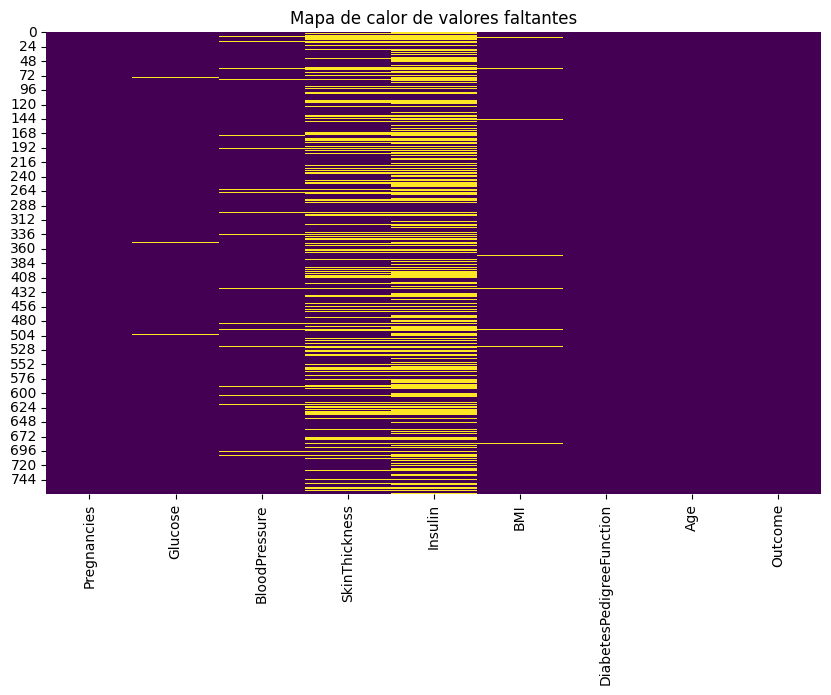


Justificación: Los valores faltantes en estas columnas son imputados en lugar de eliminarlos, ya que la eliminación podría reducir significativamente el tamaño del conjunto de datos.


In [15]:
# 3. Revisión y manejo de valores faltantes
# Justificación: Ciertos valores de 0 son improbables en columnas fisiológicas, por lo que se consideran como faltantes.
cols_reemplazo = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nValores faltantes por columna (considerando 0 como faltantes en algunas columnas):")
print((dataframe[cols_reemplazo] == 0).sum())  # Conteo de ceros en columnas críticas.

# Reemplazo de ceros por NaN para imputar.
dataframe[cols_reemplazo] = dataframe[cols_reemplazo].replace(0, np.nan)

# Verificación de valores faltantes después del reemplazo.
print("\nValores faltantes después del reemplazo de 0:")
print(dataframe.isnull().sum())

# Visualización de los valores faltantes.
plt.figure(figsize=(10, 6))
sns.heatmap(dataframe.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()

# Justificación para imputar en lugar de eliminar: Evitamos la pérdida de datos valiosos.
print("\nJustificación: Los valores faltantes en estas columnas son imputados en lugar de eliminarlos, ya que la eliminación podría reducir significativamente el tamaño del conjunto de datos.")

In [16]:
# 4. Imputación de valores faltantes
# Justificación: Usamos la media o la mediana según la naturaleza de la distribución.
print("\nJustificación adicional: Se usa la media para 'Glucose', ya que su distribución no presenta tantos outliers. Para 'BloodPressure' y otras columnas, se usa la mediana para evitar el sesgo causado por outliers.")
dataframe['Glucose'] = dataframe['Glucose'].fillna(dataframe['Glucose'].mean())  # Media para variables sin muchos outliers.
dataframe['BloodPressure'] = dataframe['BloodPressure'].fillna(dataframe['BloodPressure'].median())  # Mediana para evitar sesgo.
dataframe['SkinThickness'] = dataframe['SkinThickness'].fillna(dataframe['SkinThickness'].median())
dataframe['Insulin'] = dataframe['Insulin'].fillna(dataframe['Insulin'].median())
dataframe['BMI'] = dataframe['BMI'].fillna(dataframe['BMI'].median())

# Verificar que no queden valores faltantes
print("\nValores faltantes después de la imputación:")
print(dataframe.isnull().sum())  # Verifica si la imputación fue exitosa y no quedan valores faltantes.


Justificación adicional: Se usa la media para 'Glucose', ya que su distribución no presenta tantos outliers. Para 'BloodPressure' y otras columnas, se usa la mediana para evitar el sesgo causado por outliers.

Valores faltantes después de la imputación:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



Visualización de distribuciones individuales de las características:


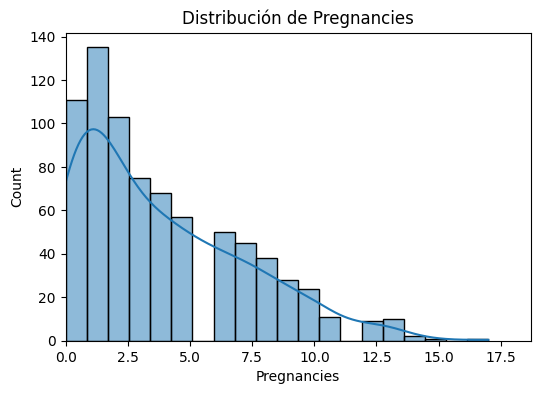

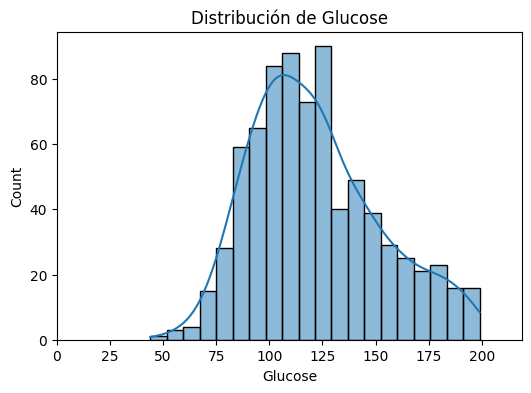

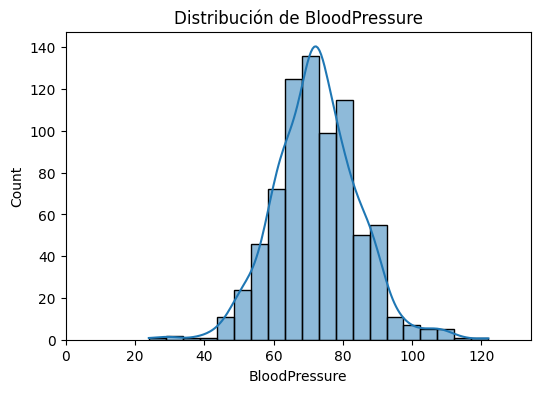

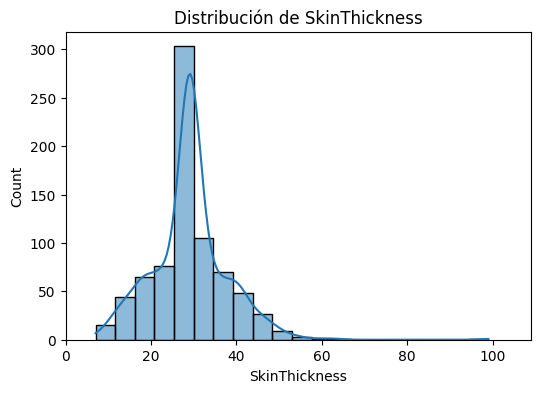

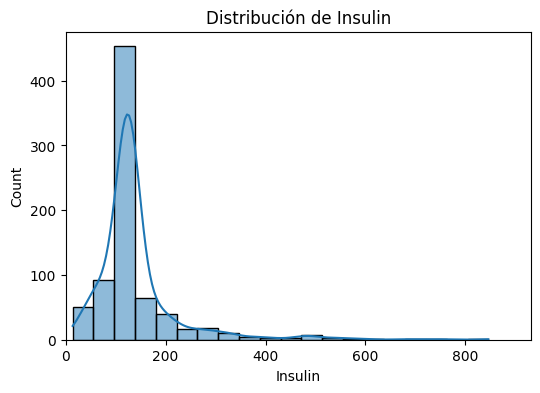

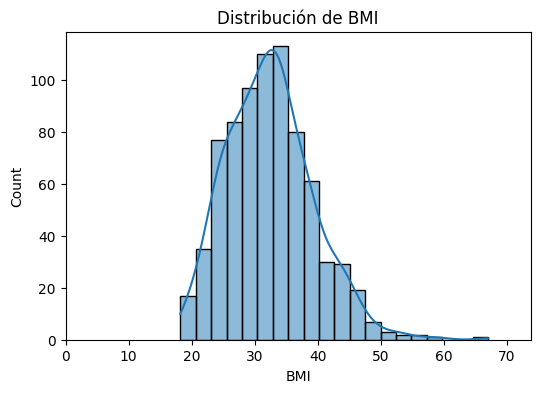

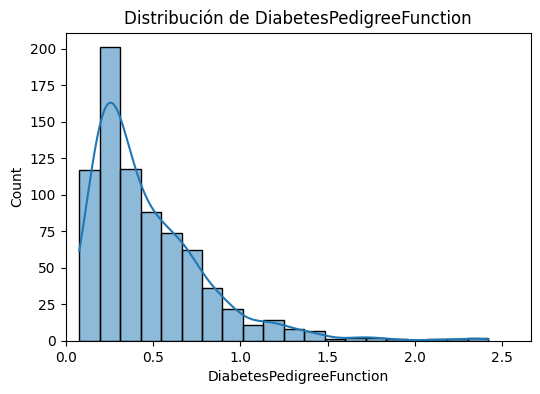

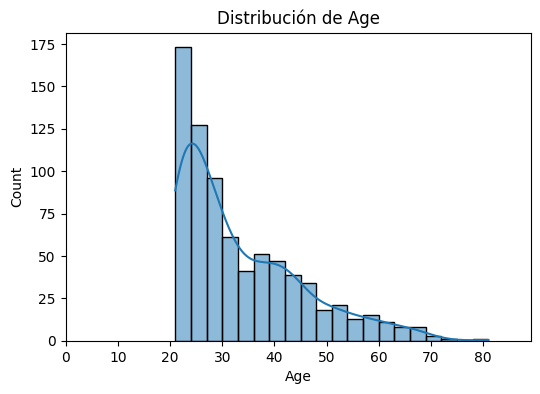

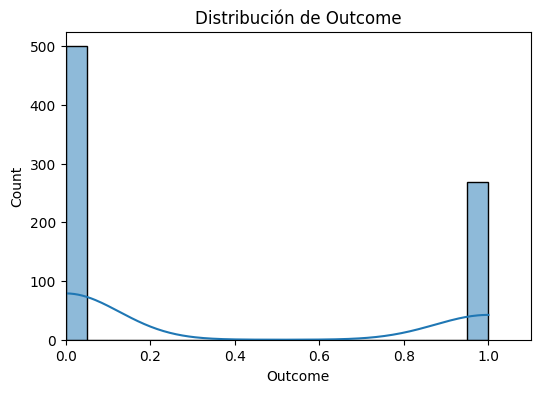

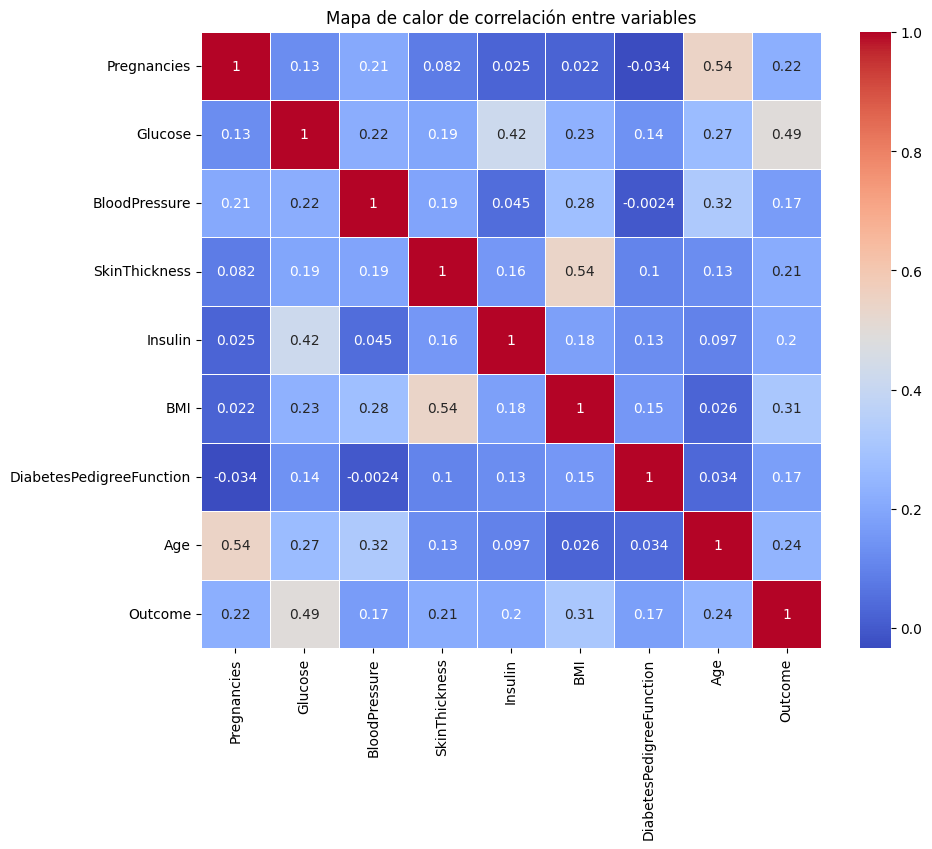

In [17]:
# 5. Exploración detallada de características
# Graficamos las distribuciones individuales de cada característica para observar la dispersión de los datos.
print("\nVisualización de distribuciones individuales de las características:")
for column in dataframe.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataframe[column], kde=True, bins=20)  # Un histograma con KDE para visualizar la forma de la distribución.
    plt.title(f'Distribución de {column}')
    plt.xlim(0, dataframe[column].max() * 1.1)  # Ajustar límites del eje X para ver mejor la distribución completa.
    plt.show()

# Mapa de calor de correlación entre variables
# Visualizamos la correlación entre las variables para detectar relaciones importantes entre las características.
plt.figure(figsize=(10, 8))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', linewidths=0.5)  # Se destaca con anotaciones el valor de la correlación.
plt.title('Mapa de calor de correlación entre variables')
plt.show()


Distribución de clases (0: No tiene diabetes, 1: Tiene diabetes):


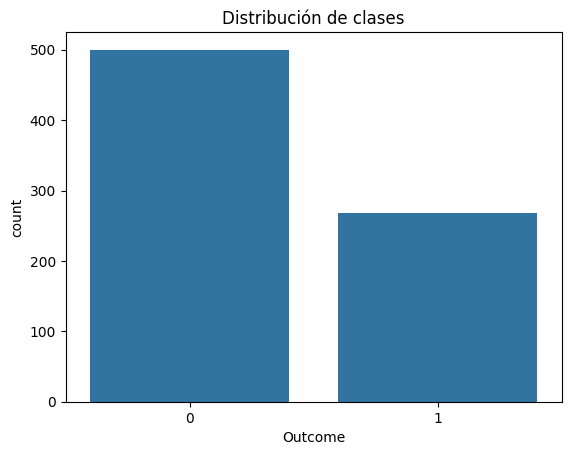


Distribución de clases en porcentaje:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


In [18]:
# 6. Evaluación del balance de clases
# Verificamos si el conjunto de datos está desbalanceado.
print("\nDistribución de clases (0: No tiene diabetes, 1: Tiene diabetes):")
sns.countplot(x='Outcome', data=dataframe)
plt.title('Distribución de clases')
plt.show()

# Mostrar el porcentaje de cada clase.
print("\nDistribución de clases en porcentaje:")
print(dataframe['Outcome'].value_counts(normalize=True) * 100)

# Justificación: Si está desbalanceado, aplicamos técnicas como SMOTE.


Detección de outliers usando diagramas de caja para las columnas relevantes:


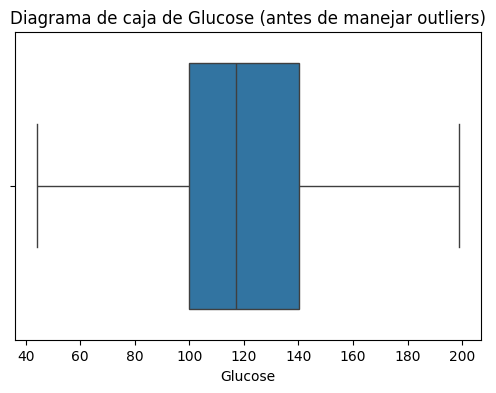

Outliers detectados en Glucose: 0 (0.00% del total)


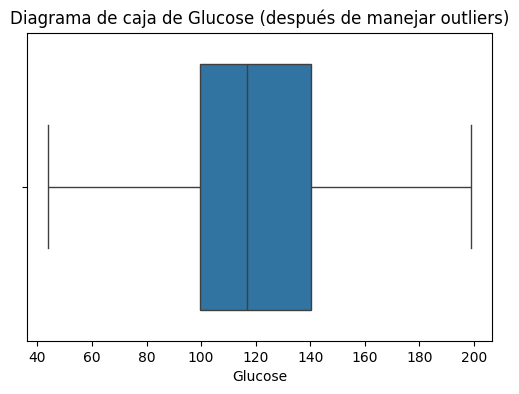

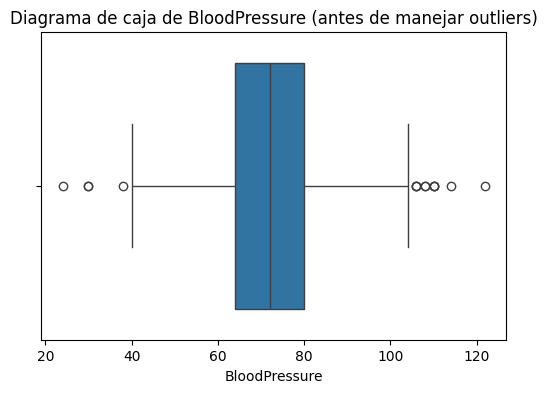

Outliers detectados en BloodPressure: 14 (1.82% del total)


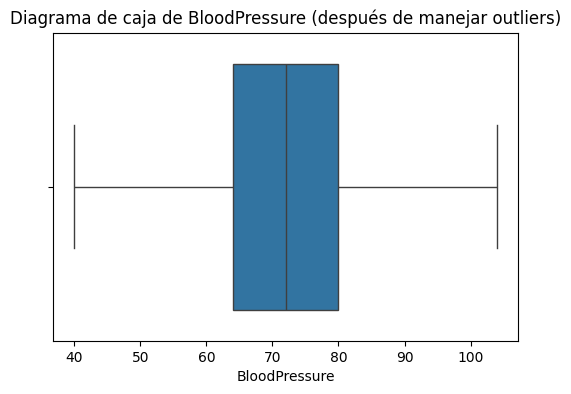

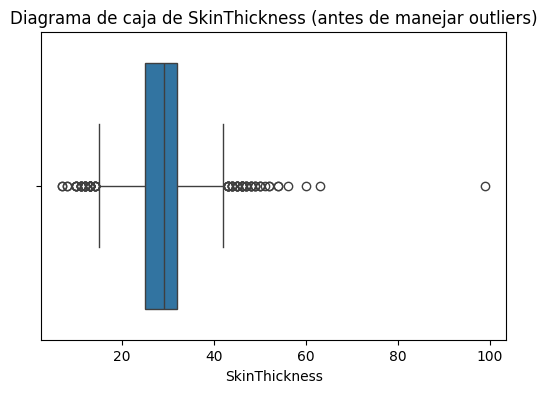

Outliers detectados en SkinThickness: 87 (11.33% del total)


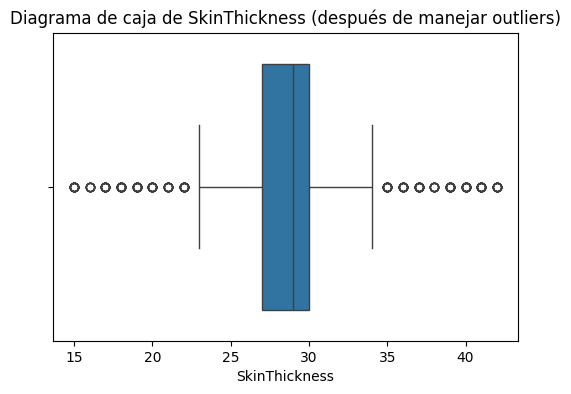

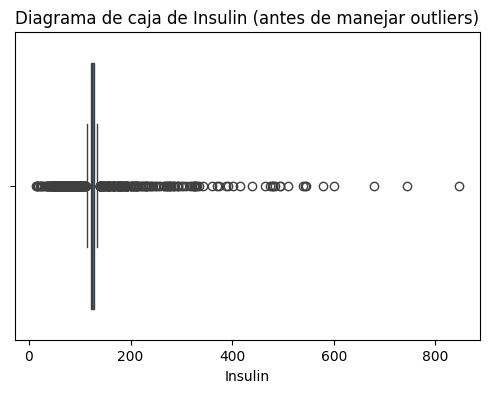

Outliers detectados en Insulin: 346 (45.05% del total)


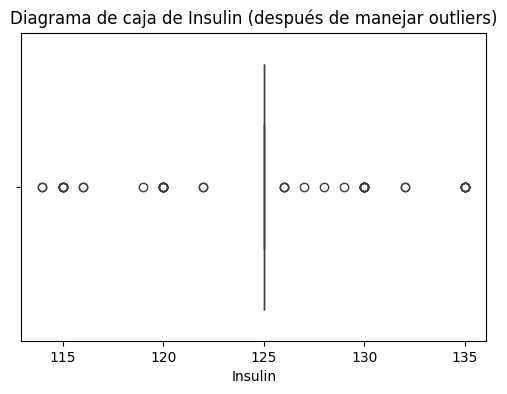

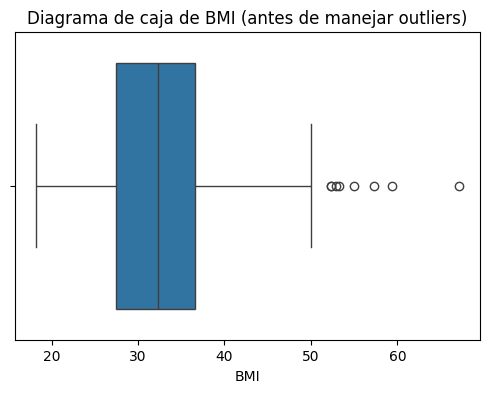

Outliers detectados en BMI: 8 (1.04% del total)


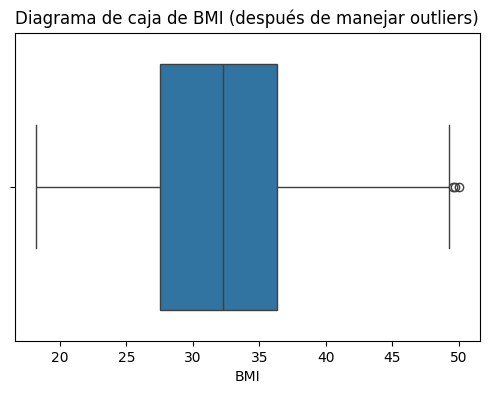

In [19]:
# 7. Detección de outliers y manejo usando imputación de la mediana
print("\nDetección de outliers usando diagramas de caja para las columnas relevantes:")

for column in cols_reemplazo:
    # Graficar antes de manejar outliers
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=dataframe[column])
    plt.title(f'Diagrama de caja de {column} (antes de manejar outliers)')
    plt.show()

    # Detección de outliers utilizando el rango intercuartílico (IQR)
    # Justificación: El rango intercuartílico (IQR) es un método común para detectar outliers.
    # El IQR no se ve afectado por valores extremos, lo que lo hace más robusto para identificar outliers
    # que otros métodos como el uso de desviación estándar.
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Justificación: Los valores que caen fuera de 1.5 veces el IQR son considerados outliers.
    # Esta regla es ampliamente utilizada en la detección de valores atípicos y nos ayuda a identificar datos
    # que podrían afectar negativamente el rendimiento de los modelos.
    outliers = dataframe[(dataframe[column] < (Q1 - 1.5 * IQR)) | (dataframe[column] > (Q3 + 1.5 * IQR))]
    porcentaje_outliers = (len(outliers) / len(dataframe)) * 100
    print(f"Outliers detectados en {column}: {len(outliers)} ({porcentaje_outliers:.2f}% del total)")

    # Imputación de outliers con la mediana
    # Justificación: Se utiliza la mediana para reemplazar los outliers debido a su robustez ante valores extremos.
    # La mediana no se ve afectada por los valores atípicos, lo que asegura que la distribución de los datos no se vea
    # distorsionada después del manejo de outliers. Eliminar los outliers reduciría el tamaño del conjunto de datos,
    # lo que podría ser contraproducente, mientras que la imputación mantiene la mayor cantidad posible de datos útiles.
    median_value = dataframe[column].median()
    dataframe.loc[dataframe[column] < (Q1 - 1.5 * IQR), column] = median_value
    dataframe.loc[dataframe[column] > (Q3 + 1.5 * IQR), column] = median_value
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=dataframe[column])
    plt.title(f'Diagrama de caja de {column} (después de manejar outliers)')
    plt.show()



Exploración de relaciones entre variables:


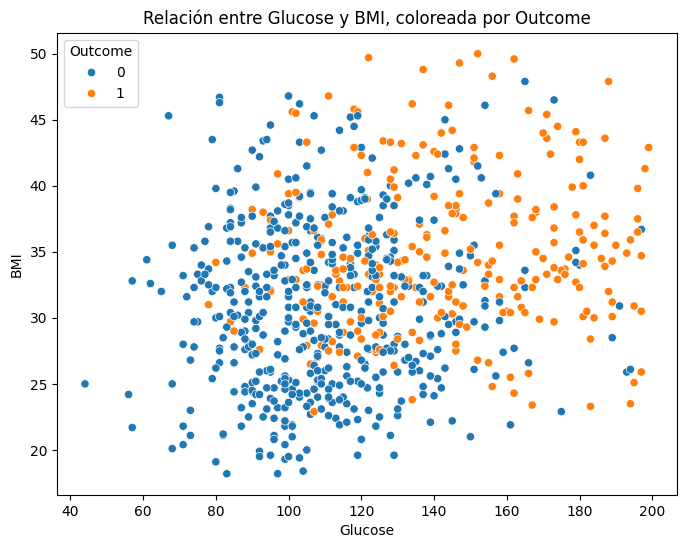

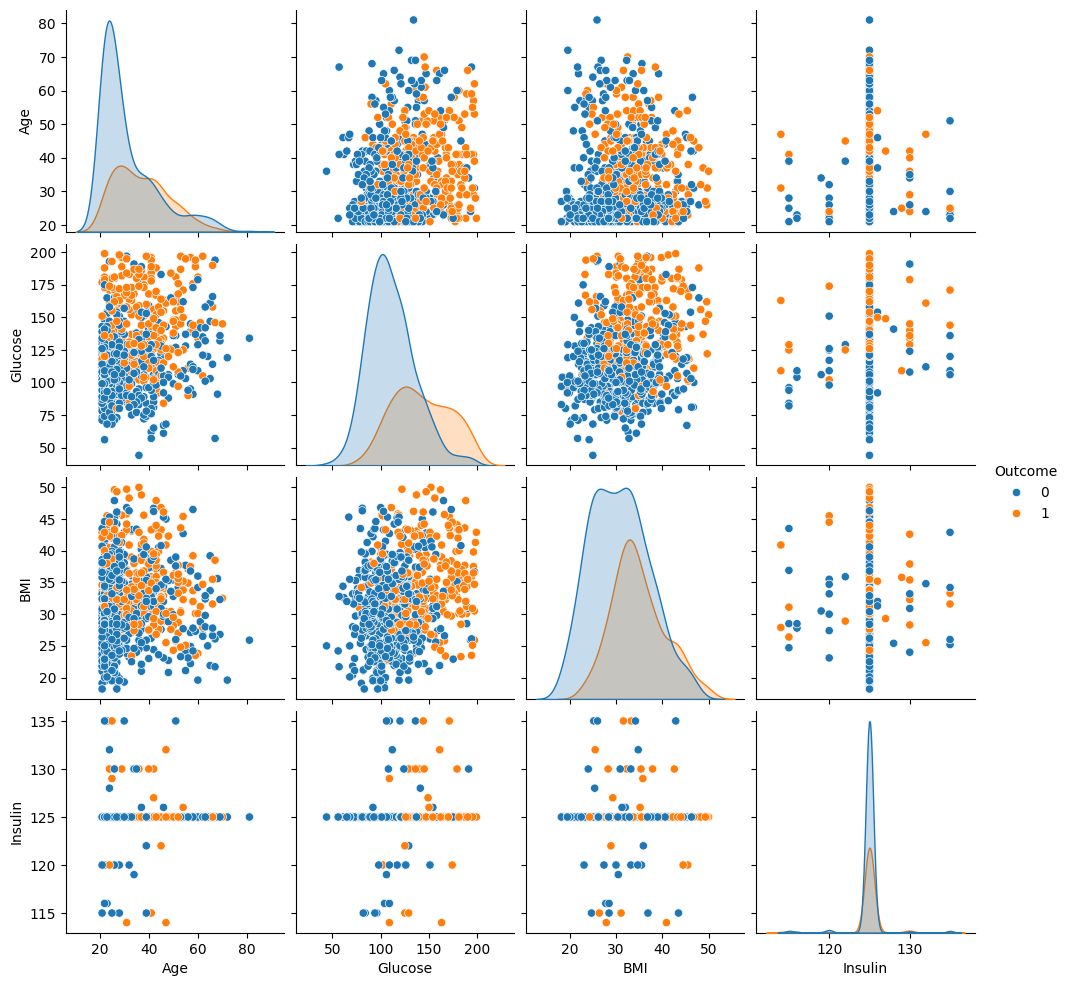

In [20]:
# 8. Exploración de relaciones entre variables
# Las relaciones entre variables nos permiten identificar posibles interacciones importantes para la predicción.
print("\nExploración de relaciones entre variables:")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=dataframe)  # Un scatter plot para explorar la relación entre dos variables clave.
plt.title('Relación entre Glucose y BMI, coloreada por Outcome')
plt.show()

# Pares de variables para explorar relaciones adicionales
sns.pairplot(dataframe, hue='Outcome', vars=['Age', 'Glucose', 'BMI', 'Insulin'])  # Utilizamos pairplots para analizar múltiples relaciones.
plt.show()

# Justificación adicional: Las relaciones entre variables como 'Glucose' y 'BMI' pueden ser clave para entender los factores de riesgo de diabetes.

### **Modelo y evaluación**

In [21]:
# 9. Separación de datos para entrenamiento, validación y prueba
# Dividimos los datos en características (X) y objetivo (y) para preparar la división en los diferentes conjuntos.
# X contiene todas las columnas predictoras, mientras que y contiene la columna objetivo 'Outcome'.
X = dataframe.drop('Outcome', axis=1)
y = dataframe['Outcome']

# División de datos en entrenamiento, validación y prueba
# Aquí, realizamos una división estratificada para asegurar que la distribución de la clase (Outcome) sea representativa en cada conjunto,
# lo cual es crucial cuando el conjunto de datos puede estar desbalanceado. La estratificación preserva la proporción de clases.
# Primero separamos el conjunto de datos en 70% para entrenamiento y 30% para validación y prueba.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Luego, dividimos el 30% restante en dos subconjuntos, 15% para validación y 15% para prueba.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Prueba de Shapiro-Wilk para saber si los datos siguen una distribución normal
# Si es una distribución normal, se utilizará StandardScaler
# Si no es una distribución normal, por la naturaleza de los datos y la futura implementación de KNN se utilizará MinMaxScaler
print("\nPrueba de Shapiro-Wilk para cada columna:")

# Verificar normalidad para cada columna y decidir el tipo de escalador
usar_minmax_scaler = False
for columna in X.columns:
    stat, p = shapiro(dataframe[columna])
    print(f'Estadístico de Shapiro-Wilk para {columna}: {stat:.4f}, p-valor: {p:.4f}')
    if p < 0.05:
        print(f'Los datos de {columna} no siguen una distribución normal (se rechaza H0)')
        usar_minmax_scaler = True
    else:
        print(f'Los datos de {columna} parecen seguir una distribución normal (no se rechaza H0)')

# Decisión sobre el escalador a utilizar
if usar_minmax_scaler:
    print("\nSe utilizará MinMaxScaler debido a la falta de normalidad en una o más columnas.")
    scaler = MinMaxScaler()
else:
    print("\nSe utilizará StandardScaler ya que los datos siguen una distribución normal.")
    scaler = StandardScaler()
    
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Verificar las formas de los conjuntos
# Esto asegura que la partición haya sido correcta y que las dimensiones de los conjuntos sean las esperadas.
print(f"\nForma del conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Forma del conjunto de validación: {X_val.shape}, {y_val.shape}")
print(f"Forma del conjunto de prueba: {X_test.shape}, {y_test.shape}")

# Justificación sobre la estratificación de clases
# La estratificación garantiza que las proporciones de clases en los subconjuntos sean consistentes con el conjunto de datos original,
# evitando posibles sesgos que podrían ocurrir si un subconjunto contiene desproporcionadamente más ejemplos de una clase que de otra.
print("\nJustificación: La estratificación asegura que el balance de clases se mantenga en los subconjuntos de entrenamiento, validación y prueba, evitando el sesgo en la evaluación del modelo.")

# Verificación del balance de clases en los conjuntos de entrenamiento, validación y prueba
# Esta función ayuda a verificar que la proporción de clases (0: no tiene diabetes, 1: tiene diabetes) se mantenga después de la partición.
def check_class_balance(y, label):
    print(f"\nDistribución de clases en el conjunto de {label}:")
    print(y.value_counts(normalize=True) * 100)

# Verificamos el balance de clases en los conjuntos de entrenamiento, validación y prueba.
check_class_balance(y_train, "entrenamiento")
check_class_balance(y_val, "validación")
check_class_balance(y_test, "prueba")


Prueba de Shapiro-Wilk para cada columna:
Estadístico de Shapiro-Wilk para Pregnancies: 0.9043, p-valor: 0.0000
Los datos de Pregnancies no siguen una distribución normal (se rechaza H0)
Estadístico de Shapiro-Wilk para Glucose: 0.9699, p-valor: 0.0000
Los datos de Glucose no siguen una distribución normal (se rechaza H0)
Estadístico de Shapiro-Wilk para BloodPressure: 0.9946, p-valor: 0.0081
Los datos de BloodPressure no siguen una distribución normal (se rechaza H0)
Estadístico de Shapiro-Wilk para SkinThickness: 0.9139, p-valor: 0.0000
Los datos de SkinThickness no siguen una distribución normal (se rechaza H0)
Estadístico de Shapiro-Wilk para Insulin: 0.2763, p-valor: 0.0000
Los datos de Insulin no siguen una distribución normal (se rechaza H0)
Estadístico de Shapiro-Wilk para BMI: 0.9906, p-valor: 0.0001
Los datos de BMI no siguen una distribución normal (se rechaza H0)
Estadístico de Shapiro-Wilk para DiabetesPedigreeFunction: 0.8365, p-valor: 0.0000
Los datos de DiabetesPedigre


Distribución de clases después de aplicar SMOTE en los datos de entrenamiento:
Outcome
1    50.0
0    50.0
Name: proportion, dtype: float64

Distribuciones antes de SMOTE (normalizadas):


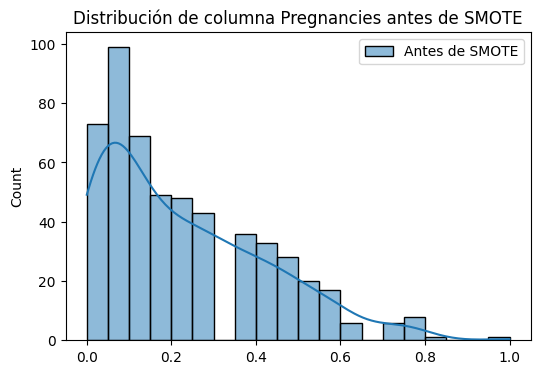

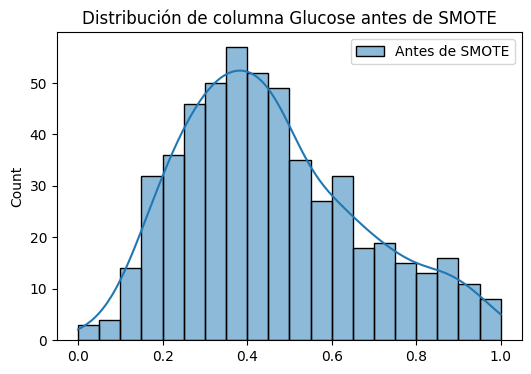

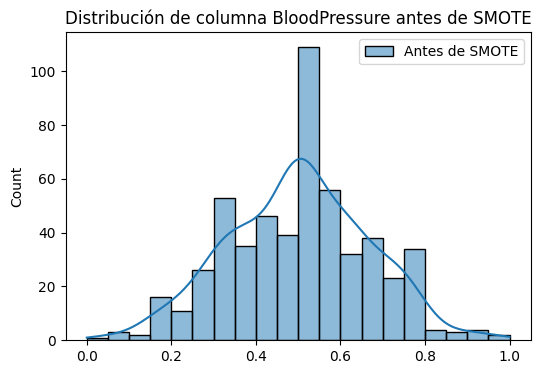

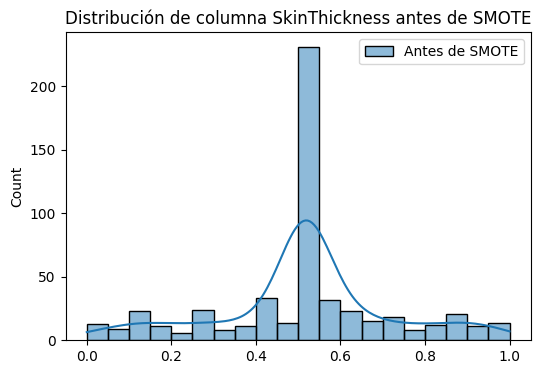

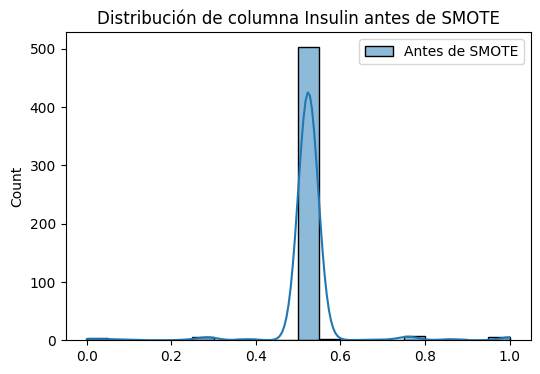

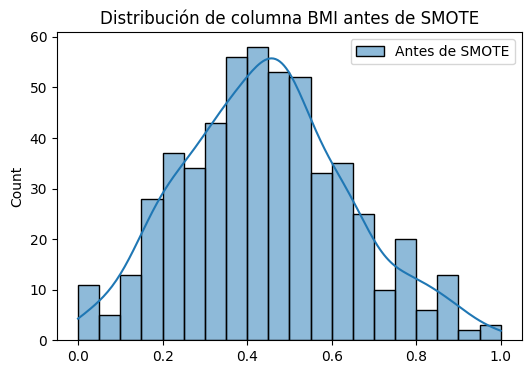

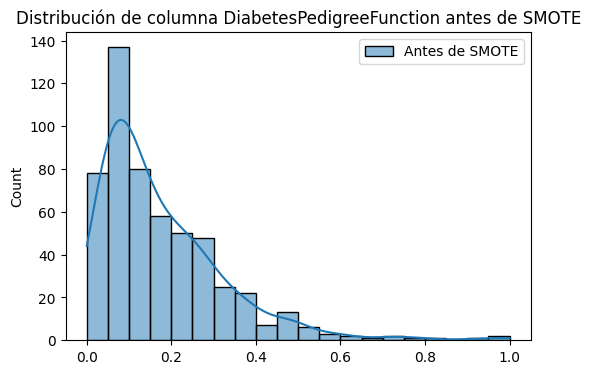

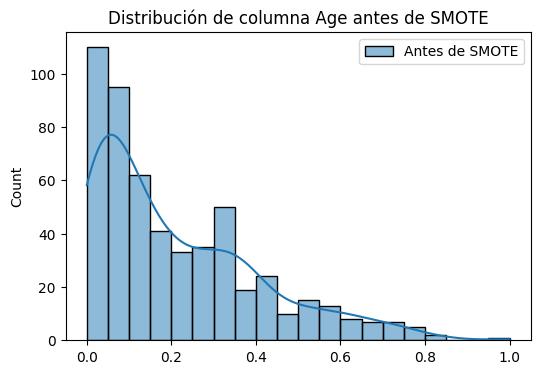


Distribuciones después de SMOTE (normalizadas):


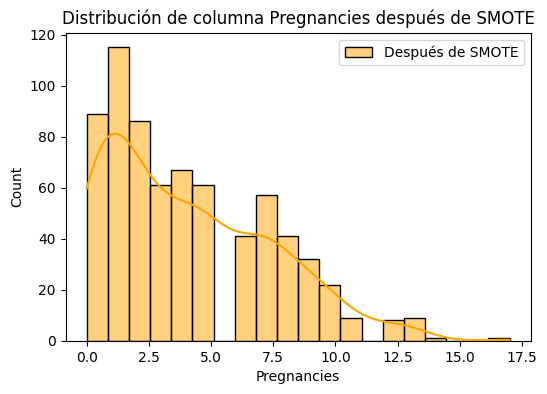

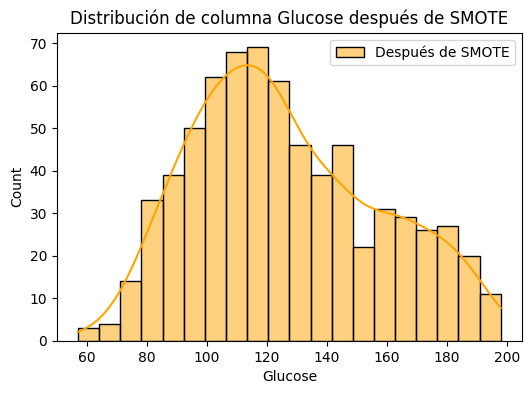

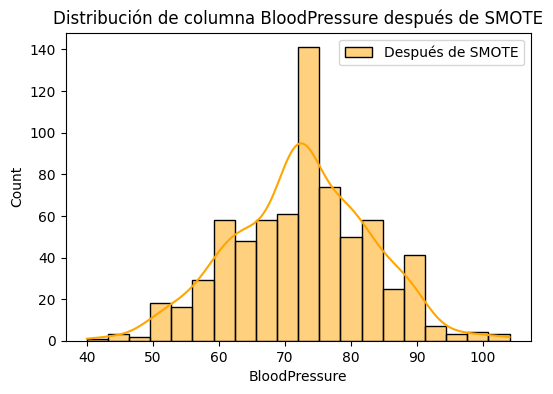

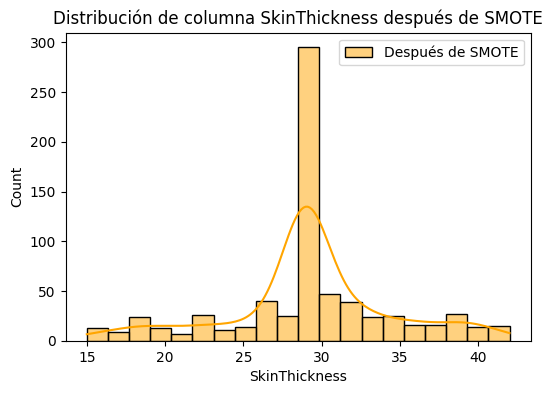

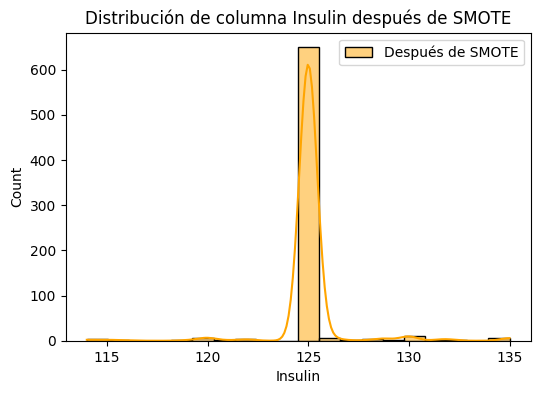

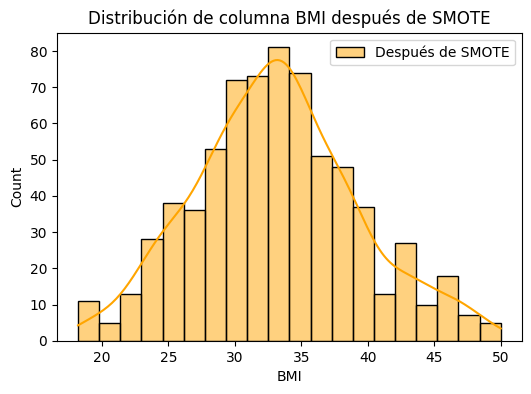

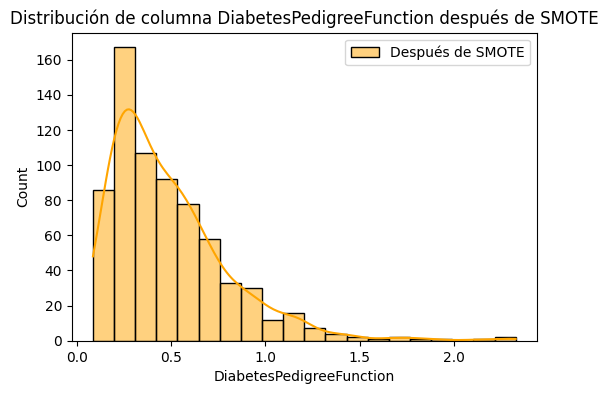

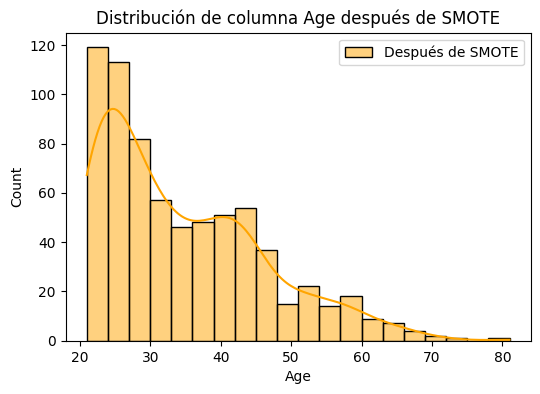

In [22]:
# 10. Sobremuestreo usando SMOTE
# El dataset tiene un desbalance de clases significativo (65% no diabéticos y 35% diabéticos).
# Esto puede afectar el desempeño de los modelos, especialmente en la capacidad de detectar correctamente
# los casos positivos (recall). Por esta razón, utilizamos SMOTE para generar ejemplos sintéticos de la clase minoritaria.
# También aplicamos ajuste de pesos en la regresión logística para mejorar la sensibilidad a la clase minoritaria.
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verificamos el nuevo balance de clases después de aplicar SMOTE
# Nos aseguramos de que las clases estén balanceadas al 50/50 en el conjunto de entrenamiento después de SMOTE.
print("\nDistribución de clases después de aplicar SMOTE en los datos de entrenamiento:")
print(pd.Series(y_resampled).value_counts(normalize=True) * 100)

# Visualización de las distribuciones antes y después de SMOTE
# Justificación: Verificamos las distribuciones de las columnas antes y después de SMOTE para asegurarnos de que no se alteraron significativamente.

print("\nDistribuciones antes de SMOTE (normalizadas):")
for column in range(X_train_scaled.shape[1]):
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train_scaled[:, column], kde=True, bins=20, label='Antes de SMOTE')
    plt.title(f'Distribución de columna {X.columns[column]} antes de SMOTE')
    plt.legend()
    plt.show()

print("\nDistribuciones después de SMOTE (normalizadas):")
for column in range(X_resampled.shape[1]):
    plt.figure(figsize=(6, 4))
    sns.histplot(X_resampled.iloc[:, column], kde=True, bins=20, label='Después de SMOTE', color='orange')
    plt.title(f'Distribución de columna {X.columns[column]} después de SMOTE')
    plt.legend()
    plt.show()


Entrenando el modelo de Regresión Logística...

Resultados del modelo de Regresión Logística (Validación):
Accuracy: 0.7043
Precision: 0.5577
Recall: 0.7250
F1-Score: 0.6304
AUC-ROC: 0.8090


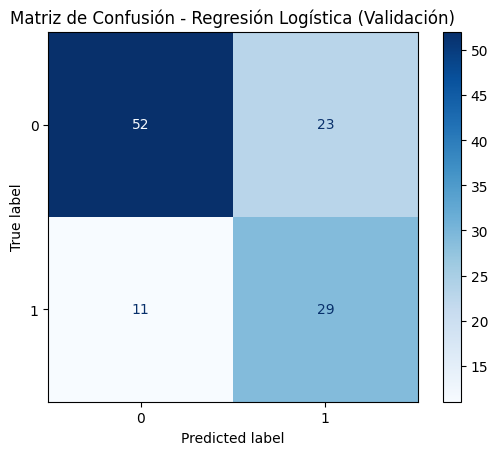


Resultados del modelo de Regresión Logística (Prueba):
Accuracy: 0.7931
Precision: 0.7179
Recall: 0.6829
F1-Score: 0.7000
AUC-ROC: 0.8670


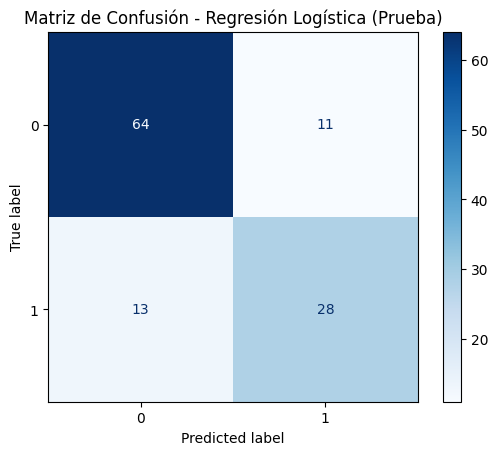

In [23]:
# 12.1 Entrenamiento de Modelo de Regresión Logística
# Justificación: Utilizamos Regresión Logística como uno de los modelos principales para la clasificación.
# Aplicamos class_weight='balanced' para ajustar los pesos de las clases, mejorando el rendimiento en la clase minoritaria.
print("\nEntrenando el modelo de Regresión Logística...")
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_resampled, y_resampled)

# Verificación del modelo con el conjunto de validación
# Justificación: Validamos el modelo con el conjunto de validación para obtener métricas como accuracy, precision, recall, F1-score y AUC-ROC.
y_val_pred_logreg = log_reg.predict(X_val)
y_val_prob_logreg = log_reg.predict_proba(X_val)[:, 1]

# Evaluación del modelo de Regresión Logística en Validación
print("\nResultados del modelo de Regresión Logística (Validación):")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_logreg):.4f}")
# Calculamos F1-Score para balancear precision y recall
f1_val_logreg = f1_score(y_val, y_val_pred_logreg)
print(f"F1-Score: {f1_val_logreg:.4f}")
# AUC-ROC para medir la capacidad del modelo para distinguir entre clases
auc_roc_val_logreg = roc_auc_score(y_val, y_val_prob_logreg)
print(f"AUC-ROC: {auc_roc_val_logreg:.4f}")

# Mostramos la matriz de confusión para la validación
cm_logreg = confusion_matrix(y_val, y_val_pred_logreg)
ConfusionMatrixDisplay(cm_logreg).plot(cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística (Validación)")
plt.show()

# Evaluación en el conjunto de prueba
# Justificación: Evaluamos el rendimiento final del modelo en el conjunto de prueba, que no ha sido utilizado en el entrenamiento o validación.
y_test_pred_logreg = log_reg.predict(X_test)
y_test_prob_logreg = log_reg.predict_proba(X_test)[:, 1]

print("\nResultados del modelo de Regresión Logística (Prueba):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_logreg):.4f}")
# Calculamos F1-Score y AUC-ROC para el conjunto de prueba
f1_test_logreg = f1_score(y_test, y_test_pred_logreg)
print(f"F1-Score: {f1_test_logreg:.4f}")
auc_roc_test_logreg = roc_auc_score(y_test, y_test_prob_logreg)
print(f"AUC-ROC: {auc_roc_test_logreg:.4f}")

# Mostramos la matriz de confusión para el conjunto de prueba
cm_test_logreg = confusion_matrix(y_test, y_test_pred_logreg)
ConfusionMatrixDisplay(cm_test_logreg).plot(cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística (Prueba)")
plt.show()


Entrenando el modelo de Regresión Logística con nuevos hiperparámetros...

Resultados del modelo de Regresión Logística (Validación):
Accuracy: 0.6957
Precision: 0.5490
Recall: 0.7000
F1-Score: 0.6154
AUC-ROC: 0.8027


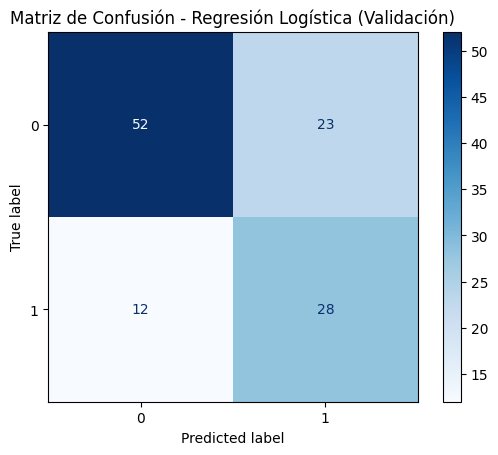


Resultados del modelo de Regresión Logística (Prueba):
Accuracy: 0.7759
Precision: 0.6829
Recall: 0.6829
F1-Score: 0.6829
AUC-ROC: 0.8686


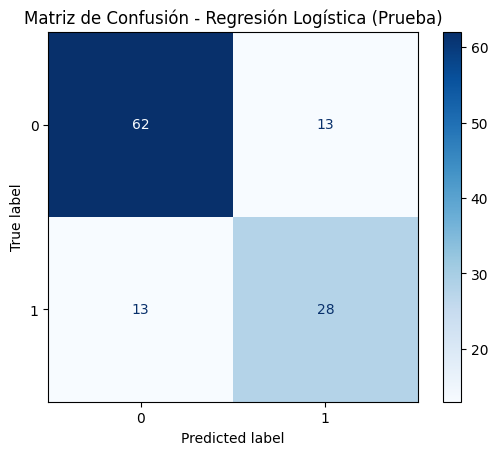

In [24]:
# 12.1 Entrenamiento de Modelo de Regresión Logística con Hiperparámetros Modificados
print("\nEntrenando el modelo de Regresión Logística con nuevos hiperparámetros...")

# Probar diferentes combinaciones de hiperparámetros
log_reg = LogisticRegression(
    penalty='l2',          # Prueba regularización L2
    C=0.1,                 # Valor de regularización más alto que el valor por defecto
    solver='lbfgs',        # Solver adecuado para regularización L2 y datasets grandes
    max_iter=1000,         # Mantener el número de iteraciones alto para asegurar convergencia
    class_weight='balanced', # Balancear las clases debido al desbalance de datos
    tol=1e-4,              # Reducir la tolerancia para mayor precisión en la convergencia
    random_state=42        # Asegurar reproducibilidad
)

# Entrenar el modelo con el conjunto balanceado (después de aplicar SMOTE)
log_reg.fit(X_resampled, y_resampled)

# Verificación del modelo con el conjunto de validación
y_val_pred_logreg = log_reg.predict(X_val)
y_val_prob_logreg = log_reg.predict_proba(X_val)[:, 1]

# Evaluación del modelo de Regresión Logística en Validación
print("\nResultados del modelo de Regresión Logística (Validación):")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_logreg):.4f}")
f1_val_logreg = f1_score(y_val, y_val_pred_logreg)
print(f"F1-Score: {f1_val_logreg:.4f}")
auc_roc_val_logreg = roc_auc_score(y_val, y_val_prob_logreg)
print(f"AUC-ROC: {auc_roc_val_logreg:.4f}")

# Mostramos la matriz de confusión para la validación
cm_logreg = confusion_matrix(y_val, y_val_pred_logreg)
ConfusionMatrixDisplay(cm_logreg).plot(cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística (Validación)")
plt.show()

# Evaluación en el conjunto de prueba
y_test_pred_logreg = log_reg.predict(X_test)
y_test_prob_logreg = log_reg.predict_proba(X_test)[:, 1]

print("\nResultados del modelo de Regresión Logística (Prueba):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_logreg):.4f}")
f1_test_logreg = f1_score(y_test, y_test_pred_logreg)
print(f"F1-Score: {f1_test_logreg:.4f}")
auc_roc_test_logreg = roc_auc_score(y_test, y_test_prob_logreg)
print(f"AUC-ROC: {auc_roc_test_logreg:.4f}")

# Mostramos la matriz de confusión para el conjunto de prueba
cm_test_logreg = confusion_matrix(y_test, y_test_pred_logreg)
ConfusionMatrixDisplay(cm_test_logreg).plot(cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística (Prueba)")
plt.show()


Entrenando el modelo de Regresión Logística con hiperparámetros modificados para mejorar métricas...

Resultados del modelo de Regresión Logística (Validación):
Accuracy: 0.6870
Precision: 0.5385
Recall: 0.7000
F1-Score: 0.6087
AUC-ROC: 0.7987


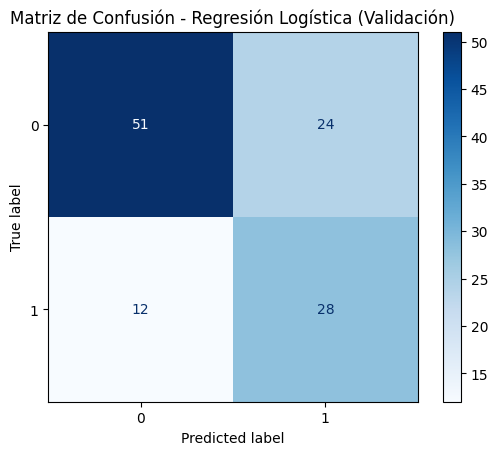


Resultados del modelo de Regresión Logística (Prueba):
Accuracy: 0.7931
Precision: 0.7073
Recall: 0.7073
F1-Score: 0.7073
AUC-ROC: 0.8728


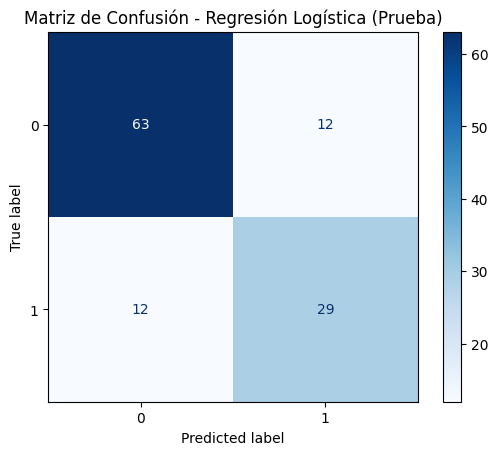

In [25]:
# 12.1 Entrenamiento de Modelo de Regresión Logística con Hiperparámetros Alternativos
print("\nEntrenando el modelo de Regresión Logística con hiperparámetros modificados para mejorar métricas...")

# Probar con regularización L1 y ElasticNet para mejorar la selección de características y reducir sobreajuste
log_reg = LogisticRegression(
    penalty='elasticnet',    # Probar ElasticNet para combinar L1 y L2
    C=0.01,                  # Aplicar mayor regularización
    solver='saga',           # Solver compatible con elasticnet y datasets grandes
    max_iter=1500,           # Aumentar el número de iteraciones para asegurar la convergencia
    class_weight='balanced', # Balancear las clases para mejorar recall en la clase minoritaria
    l1_ratio=0.5,            # Combinar regularización L1 y L2 a partes iguales
    tol=1e-4,                # Reducir la tolerancia para mayor precisión
    random_state=42          # Asegurar reproducibilidad
)

# Entrenar el modelo con el conjunto balanceado (después de aplicar SMOTE)
log_reg.fit(X_resampled, y_resampled)

# Verificación del modelo con el conjunto de validación
y_val_pred_logreg = log_reg.predict(X_val)
y_val_prob_logreg = log_reg.predict_proba(X_val)[:, 1]

# Evaluación del modelo de Regresión Logística en Validación
print("\nResultados del modelo de Regresión Logística (Validación):")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_logreg):.4f}")
f1_val_logreg = f1_score(y_val, y_val_pred_logreg)
print(f"F1-Score: {f1_val_logreg:.4f}")
auc_roc_val_logreg = roc_auc_score(y_val, y_val_prob_logreg)
print(f"AUC-ROC: {auc_roc_val_logreg:.4f}")

# Mostramos la matriz de confusión para la validación
cm_logreg = confusion_matrix(y_val, y_val_pred_logreg)
ConfusionMatrixDisplay(cm_logreg).plot(cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística (Validación)")
plt.show()

# Evaluación en el conjunto de prueba
y_test_pred_logreg = log_reg.predict(X_test)
y_test_prob_logreg = log_reg.predict_proba(X_test)[:, 1]

print("\nResultados del modelo de Regresión Logística (Prueba):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_logreg):.4f}")
f1_test_logreg = f1_score(y_test, y_test_pred_logreg)
print(f"F1-Score: {f1_test_logreg:.4f}")
auc_roc_test_logreg = roc_auc_score(y_test, y_test_prob_logreg)
print(f"AUC-ROC: {auc_roc_test_logreg:.4f}")

# Mostramos la matriz de confusión para el conjunto de prueba
cm_test_logreg = confusion_matrix(y_test, y_test_pred_logreg)
ConfusionMatrixDisplay(cm_test_logreg).plot(cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística (Prueba)")
plt.show()


Entrenando y evaluando el modelo de K-Nearest Neighbors (KNN) para valores de n de 1 a 150...
n_neighbors = 1: Accuracy = 0.7043, Precision = 0.5625, Recall = 0.6750, F1-Score = 0.6136, AUC-ROC = 0.6975
n_neighbors = 2: Accuracy = 0.6957, Precision = 0.5714, Recall = 0.5000, F1-Score = 0.5333, AUC-ROC = 0.7333
n_neighbors = 3: Accuracy = 0.7217, Precision = 0.5714, Recall = 0.8000, F1-Score = 0.6667, AUC-ROC = 0.7482
n_neighbors = 4: Accuracy = 0.7130, Precision = 0.5714, Recall = 0.7000, F1-Score = 0.6292, AUC-ROC = 0.7565
n_neighbors = 5: Accuracy = 0.6957, Precision = 0.5455, Recall = 0.7500, F1-Score = 0.6316, AUC-ROC = 0.7815
n_neighbors = 6: Accuracy = 0.6870, Precision = 0.5400, Recall = 0.6750, F1-Score = 0.6000, AUC-ROC = 0.7943
n_neighbors = 7: Accuracy = 0.7130, Precision = 0.5636, Recall = 0.7750, F1-Score = 0.6526, AUC-ROC = 0.7960
n_neighbors = 8: Accuracy = 0.7043, Precision = 0.5600, Recall = 0.7000, F1-Score = 0.6222, AUC-ROC = 0.7960
n_neighbors = 9: Accuracy = 0.695

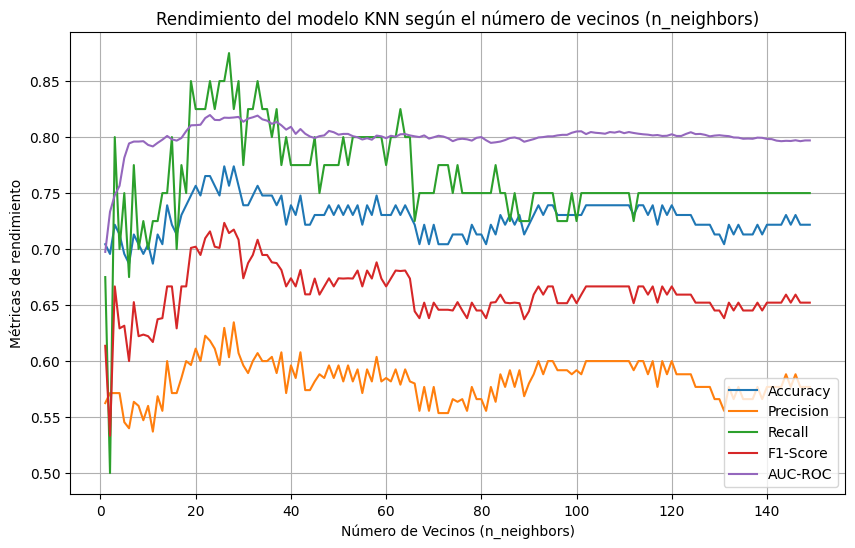

In [26]:
# 12.2 Entrenamiento de Modelo K-Nearest Neighbors (KNN) con variación de n_neighbors (1-150)
# Justificación: Evaluamos el rendimiento del modelo KNN variando el número de vecinos para observar su impacto en las métricas.

print("\nEntrenando y evaluando el modelo de K-Nearest Neighbors (KNN) para valores de n de 1 a 150...")

# Inicializar listas para almacenar los resultados
n_neighbors_list = list(range(1, 150))
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_roc_list = []

# Loop para probar con valores de n_neighbors desde 1 hasta 150 en el conjunto de validación
for n in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_resampled, y_resampled)  # Entrenamiento con el conjunto de entrenamiento resampleado (SMOTE)
    
    # Verificación del modelo con el conjunto de validación
    y_val_pred_knn = knn.predict(X_val)
    y_val_proba_knn = knn.predict_proba(X_val)[:, 1]  # Obtener la probabilidad de la clase positiva (1)
    
    # Evaluación del modelo KNN en validación
    accuracy = accuracy_score(y_val, y_val_pred_knn)
    precision = precision_score(y_val, y_val_pred_knn)
    recall = recall_score(y_val, y_val_pred_knn)
    f1 = f1_score(y_val, y_val_pred_knn)
    auc_roc = roc_auc_score(y_val, y_val_proba_knn)
    
    # Almacenar los resultados para cada n
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_roc_list.append(auc_roc)

    # Mostrar los resultados para el valor actual de n en una sola línea
    print(f"n_neighbors = {n}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}, AUC-ROC = {auc_roc:.4f}")

# Graficar los resultados en el conjunto de validación
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_list, accuracy_list, label="Accuracy")
plt.plot(n_neighbors_list, precision_list, label="Precision")
plt.plot(n_neighbors_list, recall_list, label="Recall")
plt.plot(n_neighbors_list, f1_list, label="F1-Score")
plt.plot(n_neighbors_list, auc_roc_list, label="AUC-ROC")
plt.xlabel("Número de Vecinos (n_neighbors)")
plt.ylabel("Métricas de rendimiento")
plt.title("Rendimiento del modelo KNN según el número de vecinos (n_neighbors)")
plt.legend()
plt.grid(True)
plt.show()



El mejor número de vecinos (n_neighbors) basado en Accuracy es: 26
El mejor número de vecinos (n_neighbors) basado en Precision es: 28
El mejor número de vecinos (n_neighbors) basado en Recall es: 27
El mejor número de vecinos (n_neighbors) basado en F1-Score es: 26

Resultados finales para KNN con n_neighbors basado en Accuracy = 26:
Accuracy: 0.7586
Precision: 0.6327
Recall: 0.7561
F1-Score: 0.6889


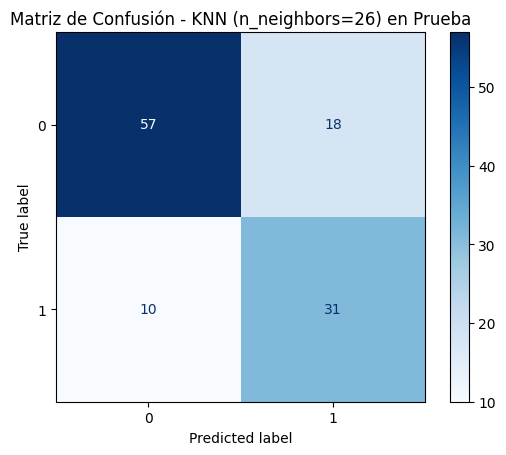


Resultados finales para KNN con n_neighbors basado en Precision = 28:
Accuracy: 0.7672
Precision: 0.6458
Recall: 0.7561
F1-Score: 0.6966


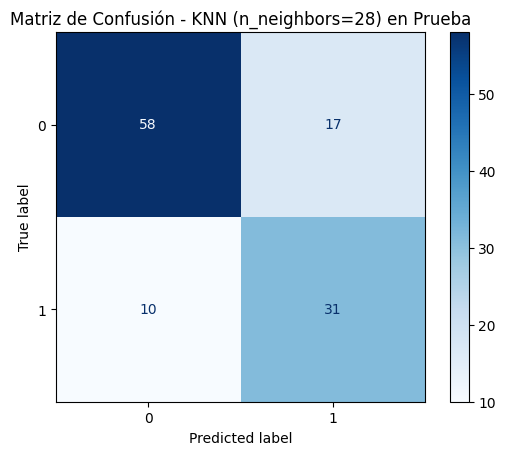


Resultados finales para KNN con n_neighbors basado en Recall = 27:
Accuracy: 0.7500
Precision: 0.6200
Recall: 0.7561
F1-Score: 0.6813


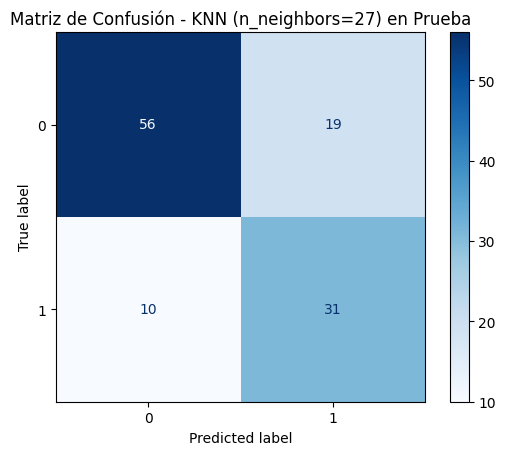


Resultados finales para KNN con n_neighbors basado en F1-Score = 26:
Accuracy: 0.7586
Precision: 0.6327
Recall: 0.7561
F1-Score: 0.6889


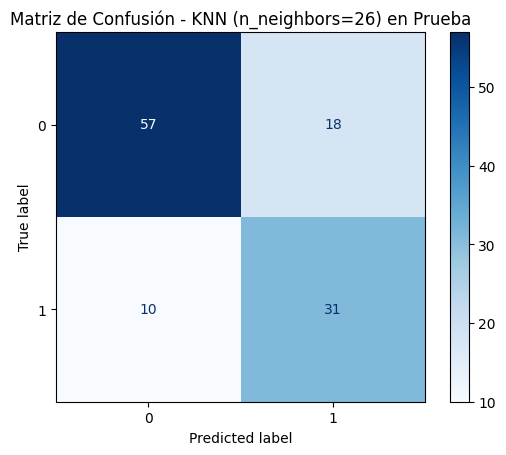


Resultados finales para KNN con n_neighbors basado en AUC-ROC = 23:
Accuracy: 0.7586
Precision: 0.6327
Recall: 0.7561
F1-Score: 0.6889
AUC-ROC: 0.8421


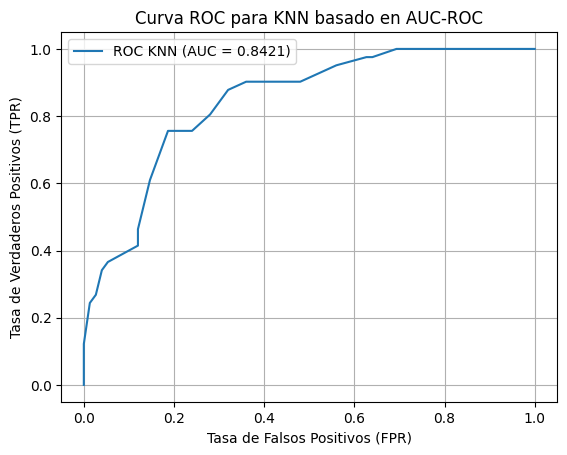

In [27]:
# Seleccionar el mejor n_neighbors basado en cada métrica
best_n_accuracy = n_neighbors_list[np.argmax(accuracy_list)]
best_n_precision = n_neighbors_list[np.argmax(precision_list)]
best_n_recall = n_neighbors_list[np.argmax(recall_list)]
best_n_f1 = n_neighbors_list[np.argmax(f1_list)]
best_n_auc_roc = n_neighbors_list[np.argmax(auc_roc_list)]  

# Imprimir los resultados de los mejores valores de n para cada métrica
print(f"\nEl mejor número de vecinos (n_neighbors) basado en Accuracy es: {best_n_accuracy}")
print(f"El mejor número de vecinos (n_neighbors) basado en Precision es: {best_n_precision}")
print(f"El mejor número de vecinos (n_neighbors) basado en Recall es: {best_n_recall}")
print(f"El mejor número de vecinos (n_neighbors) basado en F1-Score es: {best_n_f1}")

# Mejor modelo basado en Accuracy
knn_best_accuracy = KNeighborsClassifier(n_neighbors=best_n_accuracy)
knn_best_accuracy.fit(X_resampled, y_resampled)
y_test_pred_knn_accuracy = knn_best_accuracy.predict(X_test)

print(f"\nResultados finales para KNN con n_neighbors basado en Accuracy = {best_n_accuracy}:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_knn_accuracy):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_knn_accuracy):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_knn_accuracy):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_knn_accuracy):.4f}")

# Mostrar la matriz de confusión para el mejor modelo basado en Accuracy
cm_test_knn_accuracy = confusion_matrix(y_test, y_test_pred_knn_accuracy)
ConfusionMatrixDisplay(cm_test_knn_accuracy).plot(cmap='Blues')
plt.title(f"Matriz de Confusión - KNN (n_neighbors={best_n_accuracy}) en Prueba")
plt.show()

# Mejor modelo basado en Precision
knn_best_precision = KNeighborsClassifier(n_neighbors=best_n_precision)
knn_best_precision.fit(X_resampled, y_resampled)
y_test_pred_knn_precision = knn_best_precision.predict(X_test)

print(f"\nResultados finales para KNN con n_neighbors basado en Precision = {best_n_precision}:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_knn_precision):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_knn_precision):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_knn_precision):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_knn_precision):.4f}")

# Mostrar la matriz de confusión para el mejor modelo basado en Precision
cm_test_knn_precision = confusion_matrix(y_test, y_test_pred_knn_precision)
ConfusionMatrixDisplay(cm_test_knn_precision).plot(cmap='Blues')
plt.title(f"Matriz de Confusión - KNN (n_neighbors={best_n_precision}) en Prueba")
plt.show()

# Mejor modelo basado en Recall
knn_best_recall = KNeighborsClassifier(n_neighbors=best_n_recall)
knn_best_recall.fit(X_resampled, y_resampled)
y_test_pred_knn_recall = knn_best_recall.predict(X_test)

print(f"\nResultados finales para KNN con n_neighbors basado en Recall = {best_n_recall}:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_knn_recall):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_knn_recall):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_knn_recall):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_knn_recall):.4f}")

# Mostrar la matriz de confusión para el mejor modelo basado en Recall
cm_test_knn_recall = confusion_matrix(y_test, y_test_pred_knn_recall)
ConfusionMatrixDisplay(cm_test_knn_recall).plot(cmap='Blues')
plt.title(f"Matriz de Confusión - KNN (n_neighbors={best_n_recall}) en Prueba")
plt.show()

# Mejor modelo basado en F1-Score
knn_best_f1 = KNeighborsClassifier(n_neighbors=best_n_f1)
knn_best_f1.fit(X_resampled, y_resampled)
y_test_pred_knn_f1 = knn_best_f1.predict(X_test)

print(f"\nResultados finales para KNN con n_neighbors basado en F1-Score = {best_n_f1}:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_knn_f1):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_knn_f1):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_knn_f1):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_knn_f1):.4f}")

# Mostrar la matriz de confusión para el mejor modelo basado en F1-Score
cm_test_knn_f1 = confusion_matrix(y_test, y_test_pred_knn_f1)
ConfusionMatrixDisplay(cm_test_knn_f1).plot(cmap='Blues')
plt.title(f"Matriz de Confusión - KNN (n_neighbors={best_n_f1}) en Prueba")
plt.show()

# Entrenar y evaluar el mejor modelo basado en AUC-ROC
knn_best_auc_roc = KNeighborsClassifier(n_neighbors=best_n_auc_roc)
knn_best_auc_roc.fit(X_resampled, y_resampled)
y_test_pred_knn_auc_roc = knn_best_auc_roc.predict(X_test)
y_test_prob_knn_auc_roc = knn_best_auc_roc.predict_proba(X_test)[:, 1]

# Evaluar el mejor modelo en el conjunto de prueba
accuracy_test_knn_auc_roc = accuracy_score(y_test, y_test_pred_knn_auc_roc)
precision_test_knn_auc_roc = precision_score(y_test, y_test_pred_knn_auc_roc)
recall_test_knn_auc_roc = recall_score(y_test, y_test_pred_knn_auc_roc)
f1_test_knn_auc_roc = f1_score(y_test, y_test_pred_knn_auc_roc)
auc_roc_test_knn_auc_roc = roc_auc_score(y_test, y_test_prob_knn_auc_roc)

print(f"\nResultados finales para KNN con n_neighbors basado en AUC-ROC = {best_n_auc_roc}:")
print(f"Accuracy: {accuracy_test_knn_auc_roc:.4f}")
print(f"Precision: {precision_test_knn_auc_roc:.4f}")
print(f"Recall: {recall_test_knn_auc_roc:.4f}")
print(f"F1-Score: {f1_test_knn_auc_roc:.4f}")
print(f"AUC-ROC: {auc_roc_test_knn_auc_roc:.4f}")

# Graficar la curva ROC para el mejor modelo basado en AUC-ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_prob_knn_auc_roc)
plt.plot(fpr_knn, tpr_knn, label=f'ROC KNN (AUC = {auc_roc_test_knn_auc_roc:.4f})')

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para KNN basado en AUC-ROC')
plt.legend()
plt.grid(True)
plt.show()

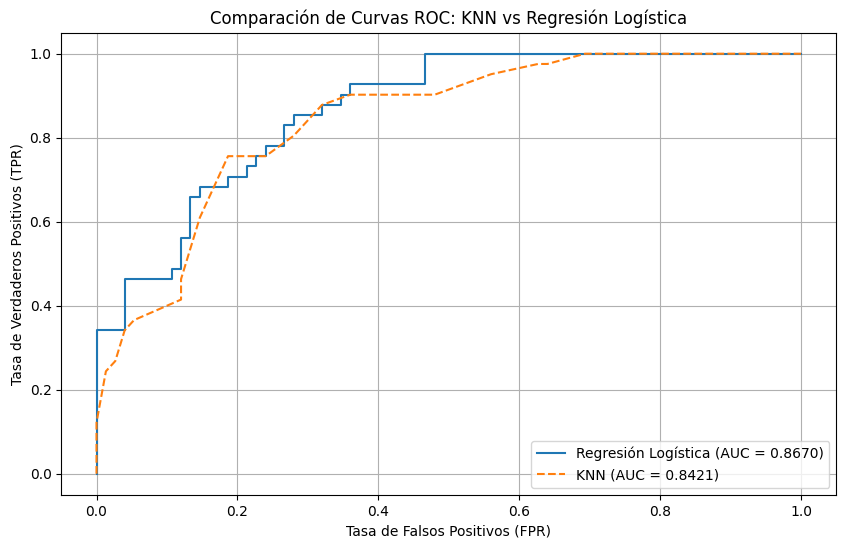

In [28]:

# Entrenamos el modelo de Regresión Logística (ya debe estar previamente entrenado)
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_resampled, y_resampled)

# Predicciones y probabilidades para Regresión Logística en el conjunto de prueba
y_test_prob_logreg = log_reg.predict_proba(X_test)[:, 1]

# Curva ROC para Regresión Logística
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_test_prob_logreg)
auc_roc_logreg = roc_auc_score(y_test, y_test_prob_logreg)

# Entrenamos el mejor modelo KNN (usamos el que tiene mejor AUC-ROC, previamente seleccionado)
knn_best_auc_roc = KNeighborsClassifier(n_neighbors=best_n_auc_roc)
knn_best_auc_roc.fit(X_resampled, y_resampled)

# Predicciones y probabilidades para KNN en el conjunto de prueba
y_test_prob_knn_auc_roc = knn_best_auc_roc.predict_proba(X_test)[:, 1]

# Curva ROC para KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_prob_knn_auc_roc)
auc_roc_knn = roc_auc_score(y_test, y_test_prob_knn_auc_roc)

# Graficamos ambas curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Regresión Logística (AUC = {auc_roc_logreg:.4f})', linestyle='-')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_roc_knn:.4f})', linestyle='--')

# Etiquetas y leyenda
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC: KNN vs Regresión Logística')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()
